In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('TCS_Historical_Data_2021-25.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,24-02-2025,"3,675.60","3,743.15","3,761.25","3,671.00",2.51M,-2.92%
1,21-02-2025,"3,786.00","3,776.10","3,817.00","3,775.00",1.83M,0.17%
2,20-02-2025,"3,779.40","3,761.50","3,788.00","3,751.30",2.89M,-0.12%
3,19-02-2025,"3,784.10","3,872.20","3,874.95","3,768.15",4.37M,-2.30%
4,18-02-2025,"3,873.20","3,898.40","3,924.40","3,864.50",2.15M,-0.80%


In [3]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [6]:
# We take ony 2 columns i.e Date and Open for analysis
df = df[['Date', 'Open']]
df.head()

,Date,Open
0,24-02-2025,"3,743.15"
1,21-02-2025,"3,776.10"
2,20-02-2025,"3,761.50"
3,19-02-2025,"3,872.20"
4,18-02-2025,"3,898.40"


In [7]:
df.columns

Index(['Date', 'Open'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    995 non-null    object
 1   Open    995 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Open'] = df['Open'].replace(",","", regex=True).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    995 non-null    datetime64[ns]
 1   Open    995 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.7 KB


In [12]:
# Durbin-Watson Test to ensure its a time Series problemn
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.00018726266068953346

<Axes: >

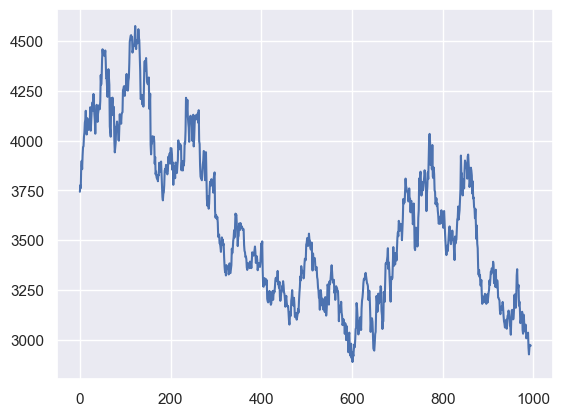

In [13]:
df['Open'].plot()

### Using Facebook Prophet model

In [14]:
!python -m pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/13.3 MB 7.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/13.3 MB 9.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/13.3 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/13.3 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/13.3 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/13.3 MB 4.1 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 4.2 MB/s eta 0:00:03
   ---

In [15]:
import prophet

In [16]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [61]:
# As per Prophet model if need to rename the columns to ds & y
df_prophet = df.rename(columns = {'Date':'ds', 'Open':'y'})

In [62]:
df_prophet

,ds,y
0,2025-02-24,3743.15
1,2025-02-21,3776.10
2,2025-02-20,3761.50
3,2025-02-19,3872.20
4,2025-02-18,3898.40
...,...,...
990,2021-03-01,2926.00
991,2021-02-26,2960.00
992,2021-02-25,2974.00
993,2021-02-24,2972.00


In [63]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

18:23:32 - cmdstanpy - INFO - Chain [1] start processing
18:23:32 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [65]:
#  Create a DataFrame containing future dates i.e 100 additional days beyond the last date in the training data - forecast for each day.
future_global = model.make_future_dataframe(periods=100, freq='D')

In [66]:
# original data
df.shape

(995, 2)

In [67]:
future_global

,ds
0,2021-02-23
1,2021-02-24
2,2021-02-25
3,2021-02-26
4,2021-03-01
...,...
1090,2025-05-31
1091,2025-06-01
1092,2025-06-02
1093,2025-06-03


In [68]:
future_global.shape

(1095, 1)

In [69]:
# Now, we are going to predict 100 days forecasting value
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-23,3125.252416,2989.422736,3282.261082,3125.252416,3125.252416,0.775345,0.775345,0.775345,9.563422,9.563422,9.563422,-8.788076,-8.788076,-8.788076,0.0,0.0,0.0,3126.027761
1,2021-02-24,3126.963909,2976.795917,3267.475714,3126.963909,3126.963909,-2.556632,-2.556632,-2.556632,11.885251,11.885251,11.885251,-14.441883,-14.441883,-14.441883,0.0,0.0,0.0,3124.407277
2,2021-02-25,3128.675402,2982.528315,3264.463039,3128.675402,3128.675402,-9.385764,-9.385764,-9.385764,10.702166,10.702166,10.702166,-20.087930,-20.087930,-20.087930,0.0,0.0,0.0,3119.289638
3,2021-02-26,3130.386895,2974.450455,3249.190542,3130.386895,3130.386895,-13.285428,-13.285428,-13.285428,12.412503,12.412503,12.412503,-25.697932,-25.697932,-25.697932,0.0,0.0,0.0,3117.101466
4,2021-03-01,3135.521373,2971.075563,3248.234387,3135.521373,3135.521373,-30.460095,-30.460095,-30.460095,11.532827,11.532827,11.532827,-41.992922,-41.992922,-41.992922,0.0,0.0,0.0,3105.061278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2025-05-31,4092.438206,3767.822843,4150.940318,3985.957346,4205.978198,-142.671642,-142.671642,-142.671642,28.733811,28.733811,28.733811,-171.405453,-171.405453,-171.405453,0.0,0.0,0.0,3949.766564
1091,2025-06-01,4092.381415,3659.680958,4025.833336,3983.943076,4208.901523,-255.997367,-255.997367,-255.997367,-84.829980,-84.829980,-84.829980,-171.167388,-171.167388,-171.167388,0.0,0.0,0.0,3836.384048
1092,2025-06-02,4092.324624,3735.495578,4112.138537,3982.157814,4210.905408,-159.228589,-159.228589,-159.228589,11.532827,11.532827,11.532827,-170.761416,-170.761416,-170.761416,0.0,0.0,0.0,3933.096036
1093,2025-06-03,4092.267833,3738.243256,4131.621734,3980.575930,4213.917373,-160.619956,-160.619956,-160.619956,9.563422,9.563422,9.563422,-170.183377,-170.183377,-170.183377,0.0,0.0,0.0,3931.647878


In [70]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [71]:
# We are interested in only few columns
prediction[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(100)

,ds,yhat_lower,yhat_upper,yhat
995,2025-02-25,3945.929996,4241.755499,4087.308840
996,2025-02-26,3936.706346,4231.822432,4083.963878
997,2025-02-27,3928.903520,4217.708487,4077.180832
998,2025-02-28,3925.910202,4226.101556,4073.391078
999,2025-03-01,3931.780175,4236.045473,4084.347073
...,...,...,...,...
1090,2025-05-31,3767.822843,4150.940318,3949.766564
1091,2025-06-01,3659.680958,4025.833336,3836.384048
1092,2025-06-02,3735.495578,4112.138537,3933.096036
1093,2025-06-03,3738.243256,4131.621734,3931.647878


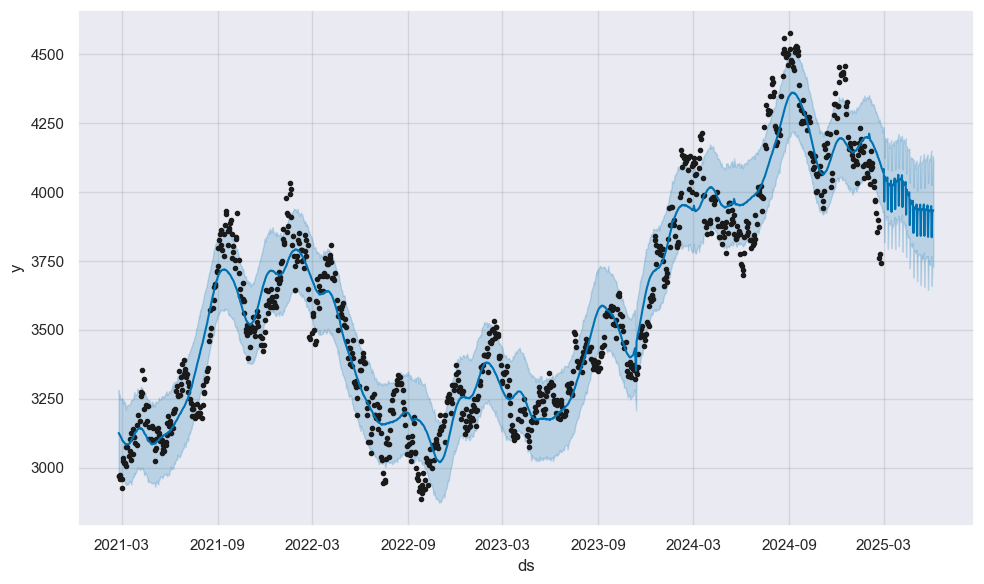

In [72]:
model.plot(prediction)
plt.show()

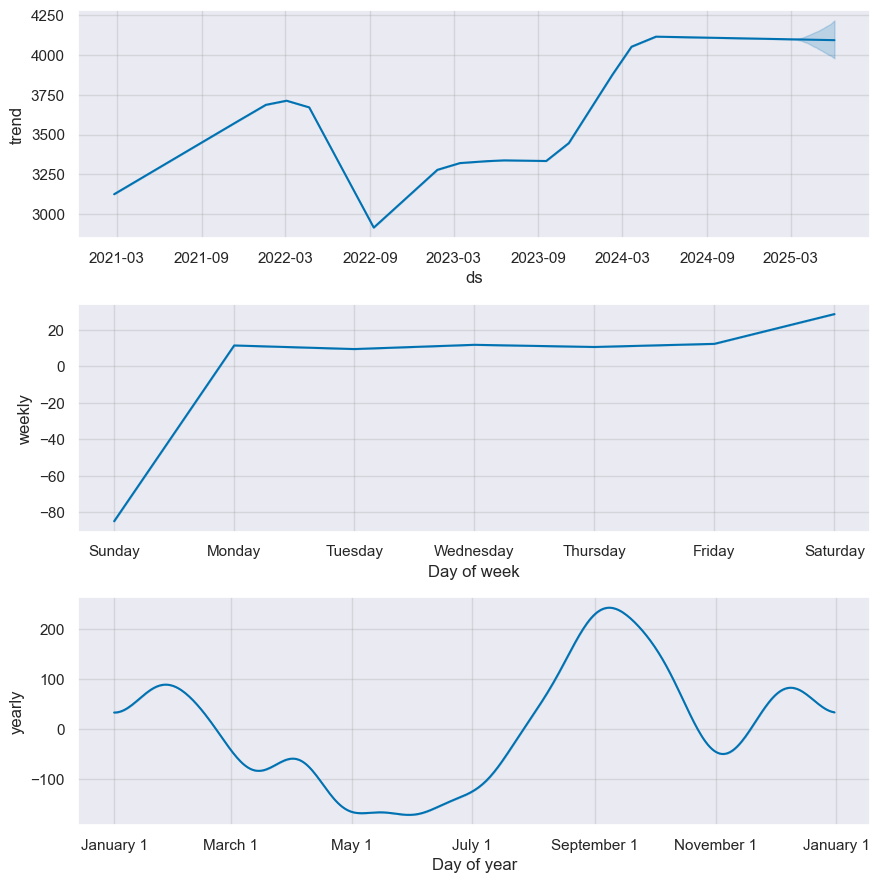

In [73]:
model.plot_components(prediction)
plt.show()

In [74]:
# Lets assess how well the trained Prophet model performs on historical data by simulating how it would have made predictions in the past.
# horizon='30 days': Specifies the forecast horizon. This means that at each step, the model will predict 30 days into the future. The model's predictions for these 30 days will be compared against actual values.
# period='15 days': This defines the spacing between cutoff points. A new training set will be created every 15 days, meaning the validation is done at multiple time points.
# initial='100 days': This specifies the minimum amount of training data required before making the first prediction. The model will not start validating until at least 100 days of data are available.
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='396 days')

  0%|          | 0/70 [00:00<?, ?it/s]

18:24:02 - cmdstanpy - INFO - Chain [1] start processing
18:24:02 - cmdstanpy - INFO - Chain [1] done processing
18:24:03 - cmdstanpy - INFO - Chain [1] start processing
18:24:03 - cmdstanpy - INFO - Chain [1] done processing
18:24:03 - cmdstanpy - INFO - Chain [1] start processing
18:24:03 - cmdstanpy - INFO - Chain [1] done processing
18:24:03 - cmdstanpy - INFO - Chain [1] start processing
18:24:03 - cmdstanpy - INFO - Chain [1] done processing
18:24:04 - cmdstanpy - INFO - Chain [1] start processing
18:24:04 - cmdstanpy - INFO - Chain [1] done processing
18:24:04 - cmdstanpy - INFO - Chain [1] start processing
18:24:04 - cmdstanpy - INFO - Chain [1] done processing
18:24:04 - cmdstanpy - INFO - Chain [1] start processing
18:24:04 - cmdstanpy - INFO - Chain [1] done processing
18:24:05 - cmdstanpy - INFO - Chain [1] start processing
18:24:05 - cmdstanpy - INFO - Chain [1] done processing
18:24:05 - cmdstanpy - INFO - Chain [1] start processing
18:24:05 - cmdstanpy - INFO - Chain [1]

In [75]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-28,3765.088134,3698.841793,3831.170040,3695.00,2022-03-27
1,2022-03-29,3780.054035,3718.154542,3846.815400,3694.75,2022-03-27
2,2022-03-30,3801.033644,3738.150754,3873.006853,3738.00,2022-03-27
3,2022-03-31,3801.414871,3732.341686,3868.550489,3740.00,2022-03-27
4,2022-04-01,3806.281963,3748.049255,3874.543468,3748.00,2022-03-27


In [76]:
df_cv.tail(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1400,2025-01-30,4568.290335,4422.735545,4713.256275,4099.90,2025-01-10
1401,2025-01-31,4575.242601,4430.805236,4719.582765,4110.00,2025-01-10
1402,2025-02-01,4622.356893,4476.546033,4766.286677,4113.00,2025-01-10
1403,2025-02-03,4584.415999,4445.820885,4726.442979,4030.90,2025-01-10
1404,2025-02-04,4582.586156,4441.253324,4730.847252,4083.70,2025-01-10
1405,2025-02-05,4588.393790,4435.442013,4724.137195,4150.00,2025-01-10
1406,2025-02-06,4586.159705,4442.775036,4731.778373,4105.40,2025-01-10
1407,2025-02-07,4589.445096,4451.344361,4734.861037,4090.00,2025-01-10
1408,2025-01-27,4409.238348,4261.478007,4546.217732,4102.00,2025-01-25
1409,2025-01-28,4414.146566,4265.210535,4553.457513,4070.80,2025-01-25


In [77]:
# lets evaluate the forecast accuracy of the Prophet model using the results from cross-validation
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,24711.643541,157.199375,128.141365,0.035572,0.031153,0.035689,0.513258
1,5 days,29518.433590,171.809294,142.381108,0.039663,0.035904,0.039667,0.454545
2,6 days,31462.972123,177.378049,146.138581,0.040941,0.036248,0.040793,0.468531
3,7 days,31256.710525,176.795675,141.936715,0.039709,0.031763,0.039400,0.520622
4,8 days,31848.817610,178.462370,141.984600,0.039567,0.030864,0.039379,0.534444
5,9 days,36776.816294,191.772825,152.377703,0.042624,0.030864,0.042729,0.514209
6,10 days,42458.544527,206.054712,164.263152,0.045962,0.036152,0.046340,0.451777
7,11 days,48240.806058,219.637898,175.699651,0.049351,0.039154,0.049759,0.419580
8,12 days,54297.978780,233.019267,189.303736,0.053102,0.041809,0.053307,0.367716
9,13 days,56352.827166,237.387504,195.926041,0.055253,0.045574,0.055105,0.347028


In [78]:
# Analysis of above output
# Lower rmse and mae are better (indicating less prediction error).
# mape < 10% is considered good; lower means a more accurate forecast. Here its 0.03 %, means very accurate forecast

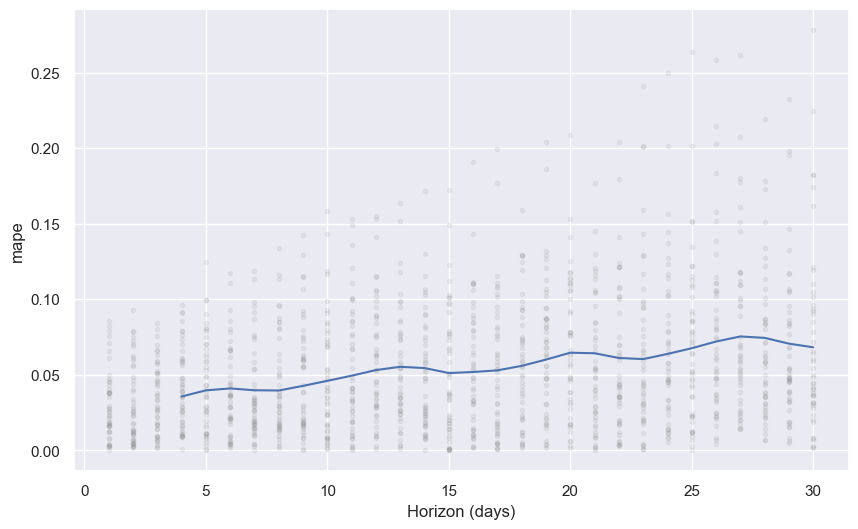

In [79]:
from prophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric = 'mape')
plt.show()

In [80]:
df_cv.to_csv("prophet_prediction_395_days.csv")

In [81]:
prediction.to_csv("final_prediction.csv")